<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Taller_1/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://bloqueneon.uniandes.edu.co/content/enforced/248650-202410_ISIS4219_01/Laboratorios.png" ><br>
# Machine Learning Techniques - ISIS4219

Primer Semestre - 2024




## Integrantes

*   Integrante 1.
*   Integrante 2.



## **Problema**

Las enfermedades cardiovasculares son la principal causa de muerte en el mundo, y se calcula que cobran 17,9 millones de vidas al año (OMS). La enfermedad de las arterias coronarias es el tipo más común de enfermedad cardíaca y se produce debido a las obstrucciones (placa) desarrolladas en el interior de las arterias coronarias (vasos sanguíneos que alimentan los músculos del corazón). Los cardiólogos utilizan diversas técnicas de imagen y mediciones invasivas de la presión arterial para examinar y controlar la gravedad de dichas obstrucciones. <br>
Los factores de riesgo conductuales más importantes de estas enfermedades son una dieta poco saludable, la inactividad física, el consumo de tabaco y el uso nocivo del alcohol. Los efectos de los factores de riesgo pueden manifestarse en las personas en forma de aumento de la presión arterial, aumento de la glucosa en sangre, aumento de los lípidos en sangre y sobrepeso y obesidad.
Identificar a las personas con mayor riesgo de sufrir enfermedades cardiovasculares y garantizar que reciban el tratamiento adecuado puede evitar muertes prematuras. Con este objetivo en mente, se quiere utilizar las técnicas de machine learning para construir un modelo que permita predecir qué pacientes pueden estar en riesgo de padecer este tipo de cardiopatía.<br><br>
Referencias. <br>



OMS (s.f.). “Cardiovascular diseases”. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
<br><br>
**Fuente de Datos**: https://www.kaggle.com/agsam23/coronary-artery-disease/version/3


**1. Procesamiento y entendimiento de los datos.**

Explore el conjunto de datos proporcionado y prepárelos para el entrenamiento y validación. Dado que este conjunto de datos no incluye un grupo de test, es necesario realizar una división entre entrenamiento y test. Utilice la función train_test_split de sklearn.model_selection para llevar a cabo esta tarea.

¿Que particularidades presentan los datos y qué técnicas de preprocesamiento se pueden aplicar?



In [3]:
# Instalar librerias

!pip install pandas
!pip install ydata-profiling
!pip install scikit-learn
!pip install sklearn_features
!pip install matplotlib

In [4]:
# Importar librerias

#Data management Libraries
import pandas as pd
import numpy as np
import sys
from ydata_profiling import ProfileReport


# Data Modeling Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_selector, ColumnTransformer


# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Save the model
from joblib import dump, load

In [5]:
# Lectura de datos
data = pd.read_csv('https://raw.githubusercontent.com/ravelinx22/machine-learning/master/Taller_1/Coronary_artery.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [189]:
# TODO Entendimiento de los datos y diccionario

In [190]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

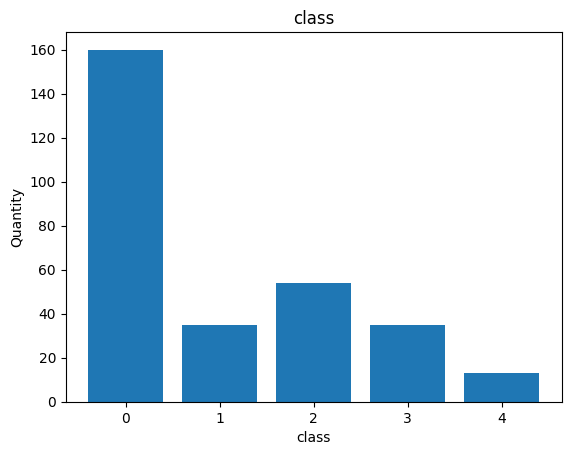

In [191]:
%matplotlib inline

plt.bar(data['class'].unique(),data['class'].value_counts())
plt.title('class')
plt.xlabel('class')
plt.ylabel('Quantity')
plt.show()

In [192]:
# Volver categoricas y booleanas a escala numerica
estimators = [('encoder', OrdinalEncoder())]
pipe = Pipeline(estimators)
pipe

collinearity_pipe = pipe.fit_transform(data)
collinearity_data = pd.DataFrame(collinearity_pipe,columns=data.columns)
collinearity_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,29.0,1.0,3.0,31.0,64.0,1.0,1.0,49.0,0.0,22.0,0.0,0.0,0.0,0.0
1,33.0,1.0,0.0,40.0,111.0,0.0,1.0,10.0,1.0,15.0,1.0,3.0,1.0,2.0
2,33.0,1.0,0.0,14.0,60.0,0.0,1.0,29.0,1.0,25.0,1.0,2.0,2.0,1.0
3,3.0,1.0,2.0,22.0,80.0,0.0,2.0,84.0,0.0,32.0,0.0,0.0,1.0,0.0
4,7.0,0.0,1.0,22.0,35.0,0.0,1.0,71.0,0.0,14.0,2.0,0.0,1.0,0.0


In [193]:
# Colinealidad de las variables
corr = collinearity_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.090712,-0.064532,0.297727,0.194393,0.133778,-0.167814,-0.392571,0.094869,0.207174,-0.159703,0.362934,0.063849,0.221883
sex,-0.090712,1.000000,-0.043255,-0.065423,-0.161810,0.038850,0.003042,-0.060987,0.143581,0.115921,-0.033345,0.091925,0.213887,0.226797
cp,-0.064532,-0.043255,1.000000,0.045928,-0.085511,0.119420,0.076037,0.297939,-0.380851,-0.132110,0.101299,-0.223416,-0.160589,-0.412093
trestbps,0.297727,-0.065423,0.045928,1.000000,0.151344,0.171245,-0.156304,-0.051057,0.054602,0.174451,-0.106118,0.100676,0.046516,0.149228
chol,0.194393,-0.161810,-0.085511,0.151344,1.000000,0.016705,-0.158032,-0.020294,0.080217,0.025023,0.015733,0.135562,0.074446,0.081594
fbs,0.133778,0.038850,0.119420,0.171245,0.016705,1.000000,-0.049191,-0.005324,-0.000893,0.015196,-0.047819,0.152086,-0.017100,0.049040
restecg,-0.167814,0.003042,0.076037,-0.156304,-0.158032,-0.049191,1.000000,0.121614,-0.091515,-0.163929,0.167901,-0.135078,0.036131,-0.214515
thalach,-0.392571,-0.060987,0.297939,-0.051057,-0.020294,-0.005324,0.121614,1.000000,-0.398105,-0.372482,0.396106,-0.274265,-0.118401,-0.425399
exang,0.094869,0.143581,-0.380851,0.054602,0.080217,-0.000893,-0.091515,-0.398105,1.000000,0.299664,-0.250572,0.148232,0.225192,0.391613
oldpeak,0.207174,0.115921,-0.132110,0.174451,0.025023,0.015196,-0.163929,-0.372482,0.299664,1.000000,-0.580542,0.287091,0.211664,0.499996


In [194]:
# TODO hablar de hallazgos de los datos

# Muy poquitos datos
# Cero duplicados y valores nulos
# Variables categoricas y booleanas
# Esta desequilibrado la variable class
# Age desde 29 por lo cual considerar prediccion va a ser mejor en estos rangos
# Desbalance en gender?
# 1 dato outlier en chol
# 2 datos oulier en trestbps
# Desbalance fbs
# restecg
# oldpeak 32% son ceros
# colinealidad con ca y oldpeak

**2.  Limpieza y preparación de datos**

Realizar el proceso de limpieza de datos con el fin de asegurar que los datos estén libres de errores, valores nulos, valores atípicos y formatos inconsistentes.

In [195]:
data = data[data['trestbps'] != 200]
data = data[data['trestbps'] != 192]
data = data[data['chol'] != 564]

In [196]:
# Setup datos train y test
train, test = train_test_split(data, test_size=0.2, random_state=2024)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
32,64,Male,Nonanginal pain,140,335,False,Normal,158,No,0.0,Unsloping,0,Normal,1
17,54,Male,Asymptomatic,140,239,False,Normal,160,No,1.2,Unsloping,0,Normal,0
262,42,Male,Asymptomatic,136,315,False,Normal,125,Yes,1.8,Flat,0,Fixed,2
124,45,Female,Atypical Angina,130,234,False,Left ventricular hypertrophy,175,No,0.6,Flat,0,Normal,0
168,70,Male,Nonanginal pain,160,269,False,Normal,112,Yes,2.9,Flat,1,Reversible defect,3


In [197]:
# Setup datos test
X_train = train.drop(['class'],axis=1)
Y_train = train['class']

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), make_column_selector(dtype_include=object)),
        ('normalize', MaxAbsScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='passthrough'
)

estimators = [
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(solver='liblinear'))
]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2a8c2efb0>),
                                                 ('normalize', MaxAbsScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2a8c2ff70>)])),
                ('clf', LogisticRegression(solver='liblinear'))])

In [198]:
param_grid = {
    'preprocessor__encoder': [OrdinalEncoder(), OneHotEncoder()],
    'preprocessor__normalize': ['passthrough', MaxAbsScaler(), MinMaxScaler(feature_range=(0, 1))]
}

# TODO hablar porque recall weighted

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='recall_weighted')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.617 total time=   0.0s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.511 total time=   0.0s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.553 total time=   0.0s
[CV 4/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.660 total time=   0.0s
[CV 5/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=passthrough;, score=0.596 total time=   0.0s
[CV 1/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.702 total time=   0.0s
[CV 2/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=MaxAbsScaler();, score=0.553 total time=   0.0s
[CV 3/5] END preprocessor__encoder=OrdinalEncoder(), preprocessor__normalize=Max

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x2a8c2efb0>),
                                                                        ('normalize',
                                                                         MaxAbsScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x2a8c2ff70>)])),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'preprocessor__encoder': [OrdinalEncoder(),
                                                   OneHotEncoder()],
                         'preprocessor__normalize': ['passthrough',
                                                     MaxAbsScaler(),
                                                     MinMaxScaler()]},
             scoring='recall_weighted', verbose=3)

In [199]:
print(grid_search.best_params_)

{'preprocessor__encoder': OrdinalEncoder(), 'preprocessor__normalize': MaxAbsScaler()}


In [200]:
resultados = pd.DataFrame(grid_search.cv_results_)
display(resultados)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__encoder,param_preprocessor__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005523,0.000721,0.002339,0.000204,OrdinalEncoder(),passthrough,"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.617021,0.510638,0.553191,0.659574,0.595745,0.587234,0.051417,5
1,0.004344,0.000409,0.002504,0.000370,OrdinalEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.702128,0.553191,0.574468,0.659574,0.617021,0.621277,0.054495,1
2,0.005270,0.001367,0.002499,0.000352,OrdinalEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OrdinalEncoder(), 'p...",0.638298,0.531915,0.574468,0.659574,0.595745,0.600000,0.045434,2
3,0.004728,0.000434,0.002017,0.000170,OneHotEncoder(),passthrough,"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.574468,0.531915,0.553191,0.638298,0.574468,0.574468,0.035603,6
4,0.003988,0.000324,0.002195,0.000191,OneHotEncoder(),MaxAbsScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.638298,0.574468,0.553191,0.659574,0.531915,0.591489,0.049259,3
5,0.004083,0.000455,0.002613,0.000484,OneHotEncoder(),MinMaxScaler(),"{'preprocessor__encoder': OneHotEncoder(), 'pr...",0.595745,0.553191,0.553191,0.680851,0.553191,0.587234,0.049625,4


In [201]:
dump(grid_search.best_estimator_, 'grid_search_model.joblib')

['grid_search_model.joblib']

**3. Modelamiento**

El proceso de modelado se refiere a la etapa en la que se construyen y entrenan modelos de machine learning para realizar predicciones o tomar decisiones basadas en datos. En este paso es importante realizar la Selección de Hiperparámetros con el fin de optimizar el modelo.

In [202]:
model = load('grid_search_model.joblib')

**4. Predicción**

Una vez realizado el entrenamiento del modelo es necesario realizar una predicción con los datos de prueba, que servira como insumo para la evaluación y/o validación de la calidad del modelo.

In [203]:
pred_train = model.predict(X_train)
display(pred_train)

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 2, 0, 3, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 3, 2, 1, 0, 0, 3,
       3, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0, 1, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       3, 0, 2, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 3, 3])

In [204]:
X_test = test.drop(['class'],axis=1)
Y_test = test['class']

pred_test = model.predict(X_test)
display(pred_test)

array([0, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0])

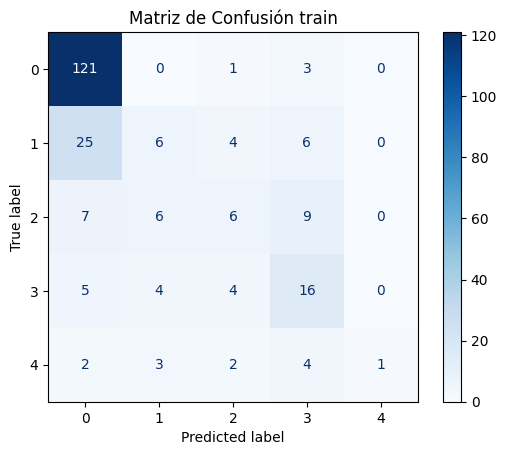

In [205]:
conf_matrix = confusion_matrix(Y_train, pred_train)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión train')
plt.show()

In [206]:
print('----------Reporte para el Modelo train ----------')

class_names = np.unique(Y_train).astype(str)
print(classification_report(Y_train,pred_train,target_names=class_names,zero_division=0))

----------Reporte para el Modelo train ----------
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       125
           1       0.32      0.15      0.20        41
           2       0.35      0.21      0.27        28
           3       0.42      0.55      0.48        29
           4       1.00      0.08      0.15        12

    accuracy                           0.64       235
   macro avg       0.57      0.39      0.39       235
weighted avg       0.60      0.64      0.59       235



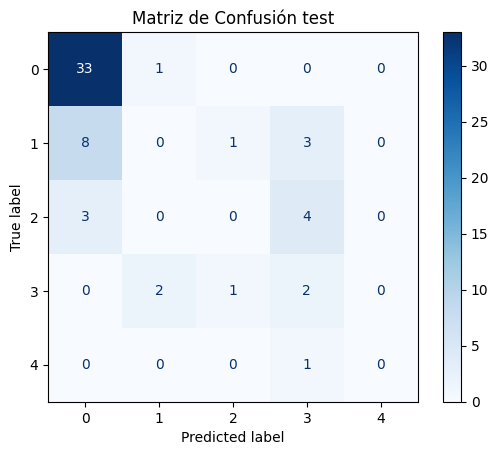

In [207]:
conf_matrix = confusion_matrix(Y_test, pred_test)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión test')
plt.show()

In [208]:
print('----------Reporte para el Modelo test ----------')

class_names = np.unique(Y_test).astype(str)
print(classification_report(Y_test,pred_test,target_names=class_names,zero_division=0))

----------Reporte para el Modelo test ----------
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        34
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.20      0.40      0.27         5
           4       0.00      0.00      0.00         1

    accuracy                           0.59        59
   macro avg       0.19      0.27      0.22        59
weighted avg       0.45      0.59      0.51        59

